<a href="https://colab.research.google.com/github/deepanshhi/Stock-Price-Prediction/blob/main/LSTM_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Google_Stock_Price_Train.csv")


In [ ]:
print(data.head())

# Check the shape of the dataset
print(data.shape)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 6)


In [ ]:
# Convert 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Extract features from datetime
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [ ]:
# Define features and target
features = ['year', 'month', 'day']
X = data[features] # X is independent var
y = data['Open']  # Assuming 'Open' is the column you want to predict (target)

In [ ]:
# Scale the data
scaler = MinMaxScaler() # btw 0 & 1

X_scaled = scaler.fit_transform(X) # cal min n max values for each features in X
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


In [ ]:
# Create sequences for RNN
timesteps = 50
X_sequences = []
y_sequences = []

for i in range(timesteps, len(X_scaled)):
    X_sequences.append(X_scaled[i-timesteps:i])
    y_sequences.append(y_scaled[i])

X_sequences, y_sequences = np.array(X_sequences), np.array(y_sequences)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=0)

In [ ]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation="tanh", input_shape=(50, 3), return_sequences=True))
model.add(Dropout(0.2)) # dropout layer with 20% dropo
model.add(LSTM(50, activation="tanh", return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
97/97 [==============================] - 15s 70ms/step - loss: 0.0276 - mse: 0.0276
Epoch 2/10
97/97 [==============================] - 8s 86ms/step - loss: 0.0109 - mse: 0.0109
Epoch 3/10
97/97 [==============================] - 7s 69ms/step - loss: 0.0107 - mse: 0.0107
Epoch 4/10
97/97 [==============================] - 10s 105ms/step - loss: 0.0102 - mse: 0.0102
Epoch 5/10
97/97 [==============================] - 7s 68ms/step - loss: 0.0105 - mse: 0.0105
Epoch 6/10
97/97 [==============================] - 8s 84ms/step - loss: 0.0113 - mse: 0.0113
Epoch 7/10
97/97 [==============================] - 6s 67ms/step - loss: 0.0088 - mse: 0.0088
Epoch 8/10
97/97 [==============================] - 8s 87ms/step - loss: 0.0101 - mse: 0.0101
Epoch 9/10
97/97 [==============================] - 7s 70ms/step - loss: 0.0084 - mse: 0.0084
Epoch 10/10
97/97 [==============================] - 8s 85ms/step - loss: 0.0082 - mse: 0.0082


In [ ]:
#Test the model
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)  # Inverse scale the predicted values
y_test_true = scaler.inverse_transform(y_test)  # Inverse scale the true test values

8/8 [==============================] - 2s 21ms/step


In [ ]:
# Plot predictions
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

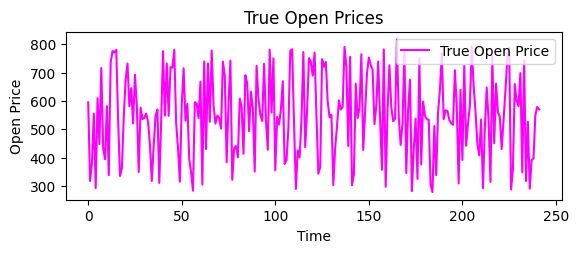

In [ ]:
# Subplot for true open prices
plt.subplot(2, 1, 1)
plt.plot(y_test_true, label='True Open Price', color='magenta')
plt.title('True Open Prices')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()

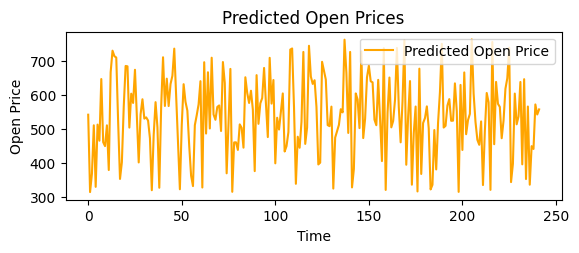

In [ ]:
# Subplot for predicted open prices
plt.subplot(2, 1, 2)
plt.plot(y_pred, label='Predicted Open Price', color='orange')
plt.title('Predicted Open Prices')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()

In [ ]:
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

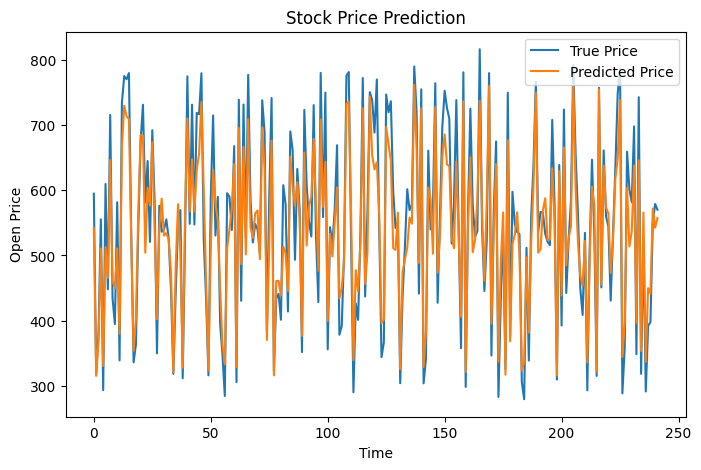

In [ ]:
# Plot predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(y_test_true, label='True Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()

Bidirectional LSTM

In [ ]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation="tanh", input_shape=(50, 3), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, activation="tanh", return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(50,activation="tanh")))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
97/97 [==============================] - 33s 169ms/step - loss: 0.0183 - mse: 0.0183
Epoch 2/10
97/97 [==============================] - 14s 145ms/step - loss: 0.0095 - mse: 0.0095
Epoch 3/10
97/97 [==============================] - 13s 137ms/step - loss: 0.0088 - mse: 0.0088
Epoch 4/10
97/97 [==============================] - 13s 139ms/step - loss: 0.0089 - mse: 0.0089
Epoch 5/10
97/97 [==============================] - 12s 127ms/step - loss: 0.0090 - mse: 0.0090
Epoch 6/10
97/97 [==============================] - 13s 134ms/step - loss: 0.0100 - mse: 0.0100
Epoch 7/10
97/97 [==============================] - 13s 131ms/step - loss: 0.0087 - mse: 0.0087
Epoch 8/10
97/97 [==============================] - 13s 139ms/step - loss: 0.0088 - mse: 0.0088
Epoch 9/10
97/97 [==============================] - 14s 140ms/step - loss: 0.0085 - mse: 0.0085
Epoch 10/10
97/97 [==============================] - 14s 147ms/step - loss: 0.0085 - mse: 0.0085


In [ ]:
#Test the model
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)  # Inverse scale the predicted values
y_test_true = scaler.inverse_transform(y_test)  # Inverse scale the true test values

8/8 [==============================] - 3s 69ms/step


In [ ]:
# Plot predictions
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

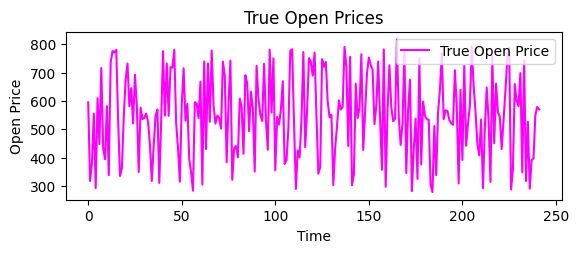

In [ ]:
# Subplot for true open prices
plt.subplot(2, 1, 1)
plt.plot(y_test_true, label='True Open Price', color='magenta')
plt.title('True Open Prices')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()